In [1]:
#Loading Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
#from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
#Reading in the data
data = pd.read_csv(r"..\data.csv")

#grabbing the features or column names
col = data.columns.values

#Looking at the data
print(data.head())
#Looking at the shape
print("Shape of Data: ",data.shape)

#Possible Statements for Later
"""
data.dropna(how='all').head()
#data.dropna(how='all').shape
#data['Unnamed: 32'].fillna(value='Unknown')
"""

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

"\ndata.dropna(how='all').head()\n#data.dropna(how='all').shape\n#data['Unnamed: 32'].fillna(value='Unknown')\n"

In [3]:
#Answer if there is any useful data in the columns with NaN.
#print('Total Valid Values on Column [Unnamed: 32]: ', data['Unnamed: 32'].value_counts().sum())
#Let's see if there is anything else in the rest of our data.
for i in data.keys():
    print('Total Valid Values on Column',i,":",data[i].value_counts().sum())
#drop the last column
x = data.drop(['Unnamed: 32'], axis = 1)
#create another dataframe for future classification algorithmn
dropList = ['Unnamed: 32', 'diagnosis', 'id']
# Create arrays for the features and the response variable
y = data['diagnosis'].values
X = data.drop(dropList, axis=1).values

Total Valid Values on Column id : 569
Total Valid Values on Column diagnosis : 569
Total Valid Values on Column radius_mean : 569
Total Valid Values on Column texture_mean : 569
Total Valid Values on Column perimeter_mean : 569
Total Valid Values on Column area_mean : 569
Total Valid Values on Column smoothness_mean : 569
Total Valid Values on Column compactness_mean : 569
Total Valid Values on Column concavity_mean : 569
Total Valid Values on Column concave points_mean : 569
Total Valid Values on Column symmetry_mean : 569
Total Valid Values on Column fractal_dimension_mean : 569
Total Valid Values on Column radius_se : 569
Total Valid Values on Column texture_se : 569
Total Valid Values on Column perimeter_se : 569
Total Valid Values on Column area_se : 569
Total Valid Values on Column smoothness_se : 569
Total Valid Values on Column compactness_se : 569
Total Valid Values on Column concavity_se : 569
Total Valid Values on Column concave points_se : 569
Total Valid Values on Column s

In [4]:
#includes missing values
data['id'].value_counts(dropna=False)

#finds NaN values
mask = data['id'].isnull()

#how many NaN values are there?
mask.sum(axis=0)

#alternatively you could use notnull(), axis = 0 means rows
#data.loc[mask, :]
#find non NaN values
#print(data.isnull().sum())
#data.loc[-mask, :]

#Determine whether there are different diagnostics.
data['diagnosis'].value_counts().sort_index()

B    357
M    212
Name: diagnosis, dtype: int64

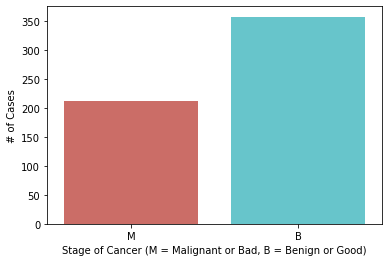

<Figure size 432x288 with 0 Axes>

In [5]:
#Print out histogram looking at the relationship between Malignant and Benign Cancer
colors = ["pale red","windows blue"]
sns.countplot(x = "diagnosis", data = data, palette ="hls")
plt.xlabel("Stage of Cancer (M = Malignant or Bad, B = Benign or Good)")
plt.ylabel("# of Cases")
plt.show()
plt.savefig('histogram.png', dpi=400)

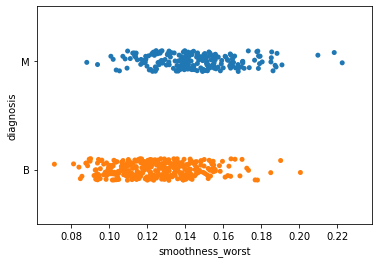

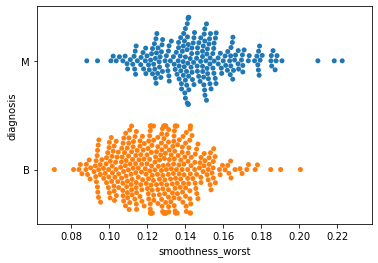

In [6]:
#plt.subplot(2,1,1)
sns.stripplot(y='diagnosis', x='smoothness_worst', data = data)
plt.savefig('stripplot.png',dpi=400)

# Make the strip plot again using jitter and a smaller point size
#plt.subplot(2,1,2)
#sns.stripplot(x='cyl', y='hp', data=auto, size = 3, jitter=True)

# Display the plot
plt.show()


sns.swarmplot(y='diagnosis',x='smoothness_worst',data=data)
plt.savefig('swarmplot.png', dpi=400)

# From resource below cancerous tumors are not uniform or defined around edges, Let's see if one can find a relationship with individual features to the diagnosis.
## https://www.verywellhealth.com/breast-cancer-tumors-or-benign-masses-430277


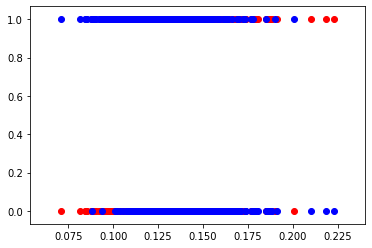

In [7]:
malignantData = data[data['diagnosis'] == 'M']
benignData = data[data['diagnosis'] == 'B']
plt.scatter(x = (data['smoothness_worst']), y = (data['diagnosis']=='M'), c ='red')
plt.scatter(x = (data['smoothness_worst']), y = (data['diagnosis']=='B'), c ='blue')
plt.savefig('scatter_01.png', dpi=400)

In [8]:
#Dropping the data from the dataframe that we cannot use to predict the diagnosis.
dataX = data.drop(dropList, axis=1)
#We map the data into a column, so we know Malignant cancer will be one and our benign cancer will be 0.
dataX['diagnosis_points'] = data['diagnosis'].map({'M':1,'B':0})
#ensure that diagnosis_points is in the data table.
dataX.head()
#colX = dataX.columns.values

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_points
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


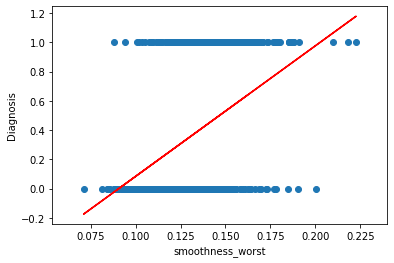

In [9]:
# Fit a linear regression model and store the predictions.
from sklearn.linear_model import LinearRegression

features_cols = ['smoothness_worst']
X = dataX[features_cols]
y = dataX['diagnosis_points']

linreg = LinearRegression()
linreg.fit(X, y)
dataX['diagnosis_points_pred'] = linreg.predict(X) # prediction via Lin Reg-

# Scatter plot that includes the regression line
plt.scatter(dataX[features_cols], dataX['diagnosis_points'])
plt.plot(dataX[features_cols], dataX['diagnosis_points_pred'], color='red')
plt.xlabel('smoothness_worst')
plt.ylabel('Diagnosis')
plt.savefig('scatter_02_with_line.png', dpi=400)


If smoothnest_worst = 0.225, class predict for the diagnosis? 1
If smoothnest_worst = 0.075, class predict for the diagnosis? 0

Cutoff Value: smoothness_worst = 0.150
If diagnosis_points_pred >= 0.5, predict class: 1. Otherwise, predcit class: 0

In [10]:
dataX['diagnosis_pred_class'] = np.where(dataX['diagnosis_points_pred'] >= 0.5, 1, 0)
dataX.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_points,diagnosis_points_pred,diagnosis_pred_class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1,0.639057,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1,0.296043,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1,0.480056,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1,1.064252,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1,0.417527,0


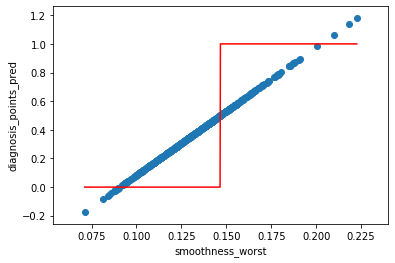

In [11]:
dataX = dataX.sort_values('smoothness_worst')

plt.scatter(dataX['smoothness_worst'], dataX['diagnosis_points_pred'])

plt.xlabel('smoothness_worst')
plt.ylabel('diagnosis_points_pred')

plt.plot(dataX['smoothness_worst'], dataX['diagnosis_pred_class'], color='red');
plt.savefig('scatter_03_with_line_02.png', dpi=400)

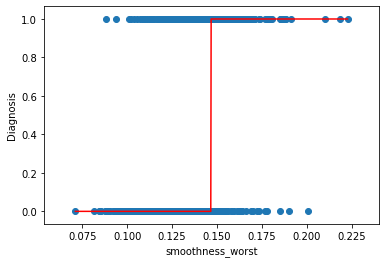

In [12]:
plt.scatter(dataX['smoothness_worst'], dataX['diagnosis_points'])
plt.plot(dataX['smoothness_worst'], dataX['diagnosis_pred_class'], color='red')
plt.xlabel('smoothness_worst')
plt.ylabel('Diagnosis')
plt.savefig('scatter_04_with_line_03.png', dpi=400)

(31, 31)


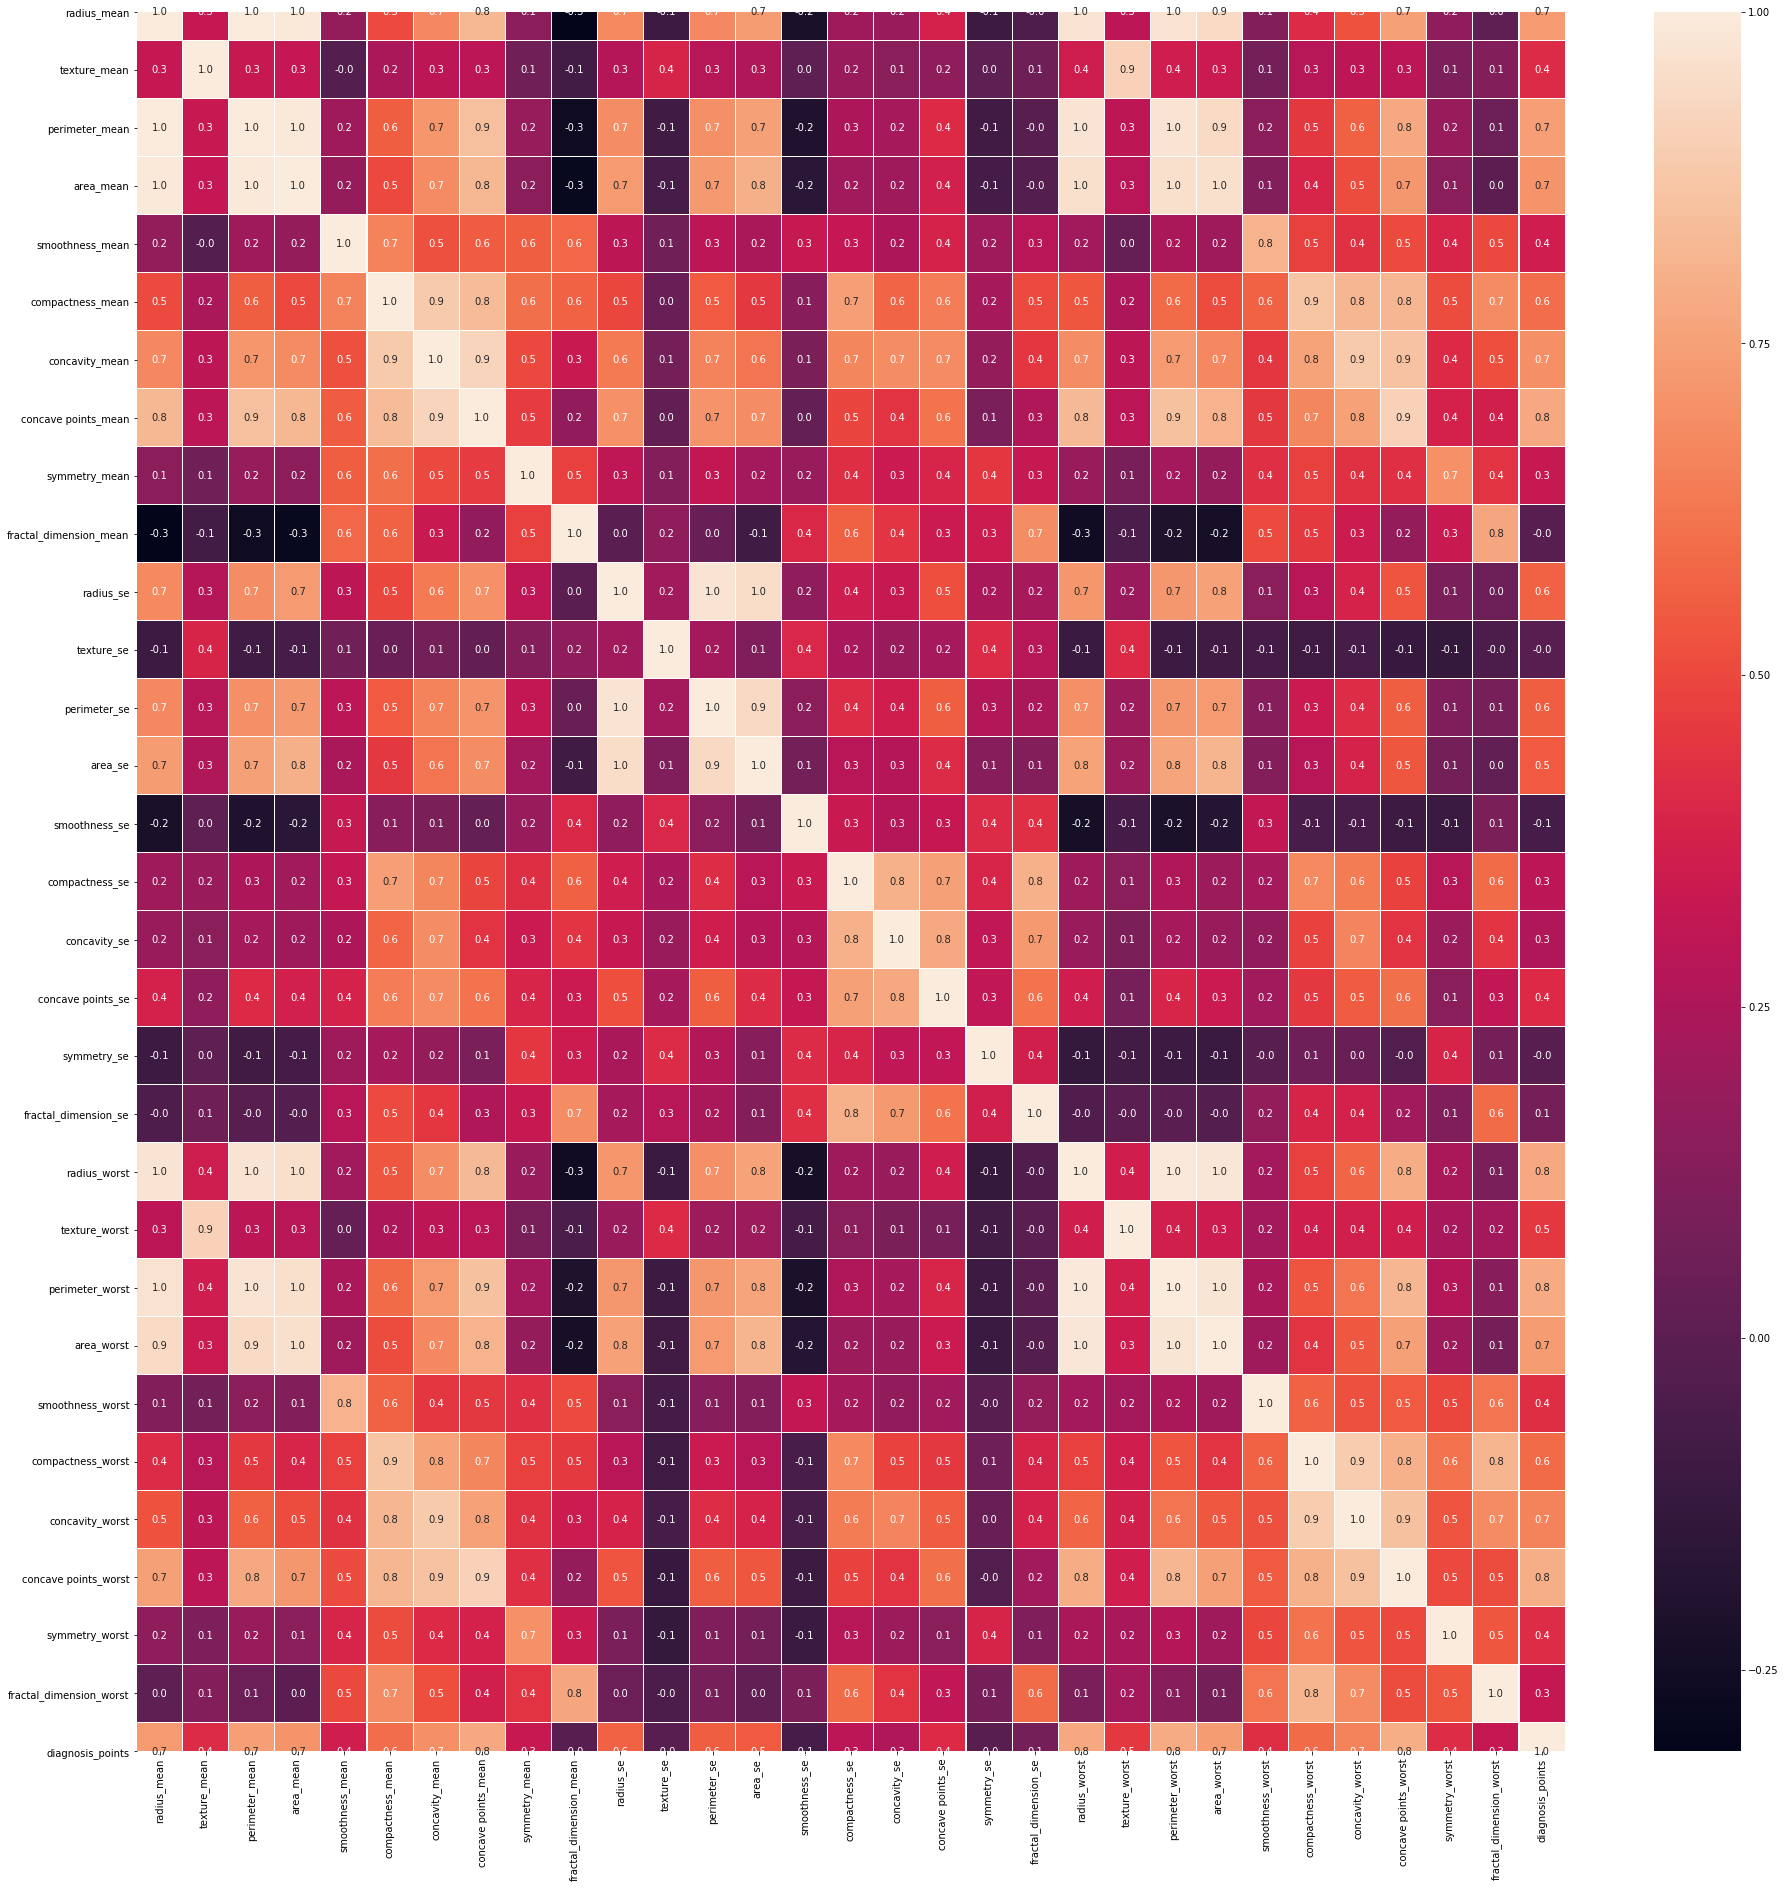

In [21]:
dropHeatMapList = ['Unnamed: 32', 'id']
dataHeatMap = data.drop(dropHeatMapList, axis=1)
dataHeatMap['diagnosis_points'] = data['diagnosis'].map({'M':1,'B':0})
correlationDM = dataHeatMap.corr()
f, ax = plt.subplots(figsize=(32,32))
sns.heatmap(correlationDM, linewidths=0.1, annot=True, fmt='.1f', ax=ax)
print(correlationDM.shape)
plt.savefig('heatmap_01', dpi=400)

(21, 21)


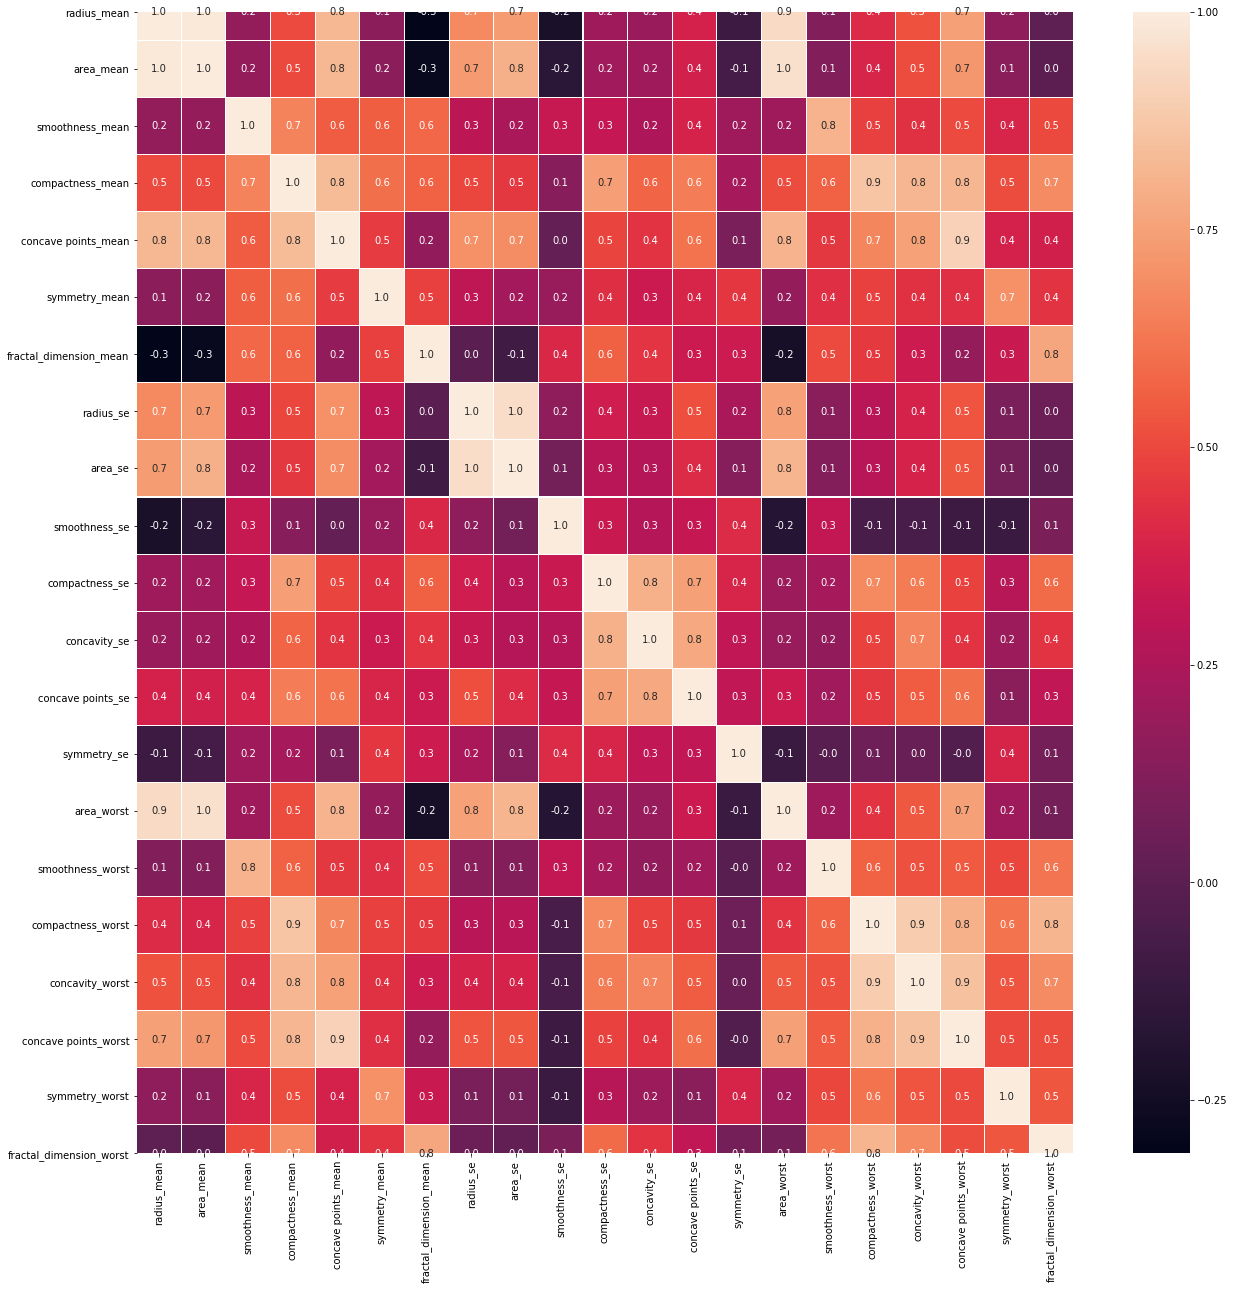

In [14]:
columns = np.full((correlationDM.shape[0],), True, dtype=bool)
for a in range(correlationDM.shape[0]):
    for b in range(a+1, correlationDM.shape[0]):
        if correlationDM.iloc[a,b] >= 0.9:
            if columns[a]:
                columns[b] = False
dataHeatMap['diagnosis_points'] = data['diagnosis'].map({'M':1,'B':0})
dataHeatMapWith = dataHeatMap
dataHeatMap = data.drop(dropHeatMapList, axis=1)
selected_columns = dataHeatMap.columns[columns]
dataHeatMapX = dataHeatMap[selected_columns]
#print(dataHeatMapX)
correlationDMX = dataHeatMapX.corr()
print(correlationDMX.shape)
f, ax = plt.subplots(figsize=(21,21))
sns.heatmap(correlationDMX, linewidths=0.1, annot=True, fmt='.1f', ax=ax)
plt.savefig('heatmap_2', dpi=400)

In [15]:
#Normalization
dataHeatMapNorm = dataHeatMapX.drop('diagnosis', axis=1)
#print(dataHeatMapNorm)
dataHeatMapNorm = (dataHeatMapNorm - np.min(dataHeatMapNorm)) / (np.max(dataHeatMapNorm) - np.min(dataHeatMapNorm)).values
trainingKeys = ['radius_mean','area_mean','smoothness_mean','compactness_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']
dataHeatMapNorm['diagnosis'] = dataHeatMapWith['diagnosis_points']

In [16]:
#Split train at 70% and test at 30%.
train, test = train_test_split(dataHeatMapNorm, test_size = 0.3)
print(train.shape)
print(test.shape)
trainingX = train[trainingKeys]
trainingY = train['diagnosis']
testingX = test[trainingKeys]
testingY = test['diagnosis']

(398, 22)
(171, 22)


In [17]:
#Using LogisticRegression Model by fitting data, making predictions, and judging accuracy.
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
diagnosisTrain = train['diagnosis']
newTrain = train[trainingKeys]

""" error may occur with splitting data, reshaping is required.
print(diagnosisTrain.shape)
print(newTrain.shape)
diagnosisTrain = diagnosisTrain.values.reshape((398,1))
"""

LR.fit(trainingX,trainingY)
predictions = LR.predict(testingX)
accuracy = metrics.accuracy_score(predictions,testingY)
print("Logistic Regression Accuracy: ", accuracy)

Logistic Regression Accuracy:  0.9532163742690059


C:\Users\chappie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
#USING SVM; SAME IDEA ABOVE
from sklearn import svm
SVM = svm.SVC()
SVM.fit(trainingX,trainingY)
SVMpredictions = SVM.predict(testingX)
SVMaccuracy = metrics.accuracy_score(SVMpredictions, testingY)
print("SVM Accuracy: ",SVMaccuracy)

SVM Accuracy:  0.935672514619883


C:\Users\chappie\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [20]:
#USING StratifiedKFold def as to validate the models
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import KFold

def SKFModel(model, data, pred, out, name):
    model.fit(data[pred],data[out]) #Here we fit the model using training set
    predictions = model.predict(data[pred])
    accuracy = metrics.accuracy_score(predictions,data[out])
    print("Accuracy Before: ", accuracy)
    accuracyAfter = []
    SKF = StratifiedKFold(n_splits = 10)
    SKF.get_n_splits(data[pred],data[out])
    for train, test in SKF.split(data[pred],data[out]):
        trainingX = data[pred].iloc[train]
        trainingY = data[out].iloc[train]
        testingX = data[pred].iloc[test]
        testingY = data[out].iloc[test]
        model.fit(trainingX,trainingY)
        classifierPred = model.predict(testingX)
        accuracyAfter.append(metrics.accuracy_score(classifierPred,testingY))
    print("Accuracy After",name, "Stratified KFold: ",np.array(accuracyAfter).mean())
        
SKFModel(SVM,dataHeatMapNorm,trainingKeys,'diagnosis', 'SVM')
SKFModel(LR, dataHeatMapNorm,trainingKeys,'diagnosis', 'LR')
DTC = DecisionTreeClassifier()
SKFModel(DTC, dataHeatMapNorm, trainingKeys, 'diagnosis', 'DTC')

C:\Users\chappie\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\chappie\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\chappie\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\chappie\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: Fut

Accuracy Before:  0.9384885764499121
Accuracy After SVM Stratified KFold:  0.9352022297122116
Accuracy Before:  0.9525483304042179
Accuracy After LR Stratified KFold:  0.9473911070780398
Accuracy Before:  1.0
Accuracy After DTC Stratified KFold:  0.9174693198513525
